# **Assignment  02** 

Name: 
### **Parth Dasawant**

PRN: 
### **240340128007**

### **Implement Perceptron with Sigmoid activation Function**

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

## Import Statements

In [2]:
###-----------------
### Import Libraries
###-----------------

import os
import sys
sys.path.insert(0, r'G:\My Drive\DNN')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
 
# from utils.helper import fn_plot_decision_boundary # this function is from helper.py

In [3]:
# print (fn_plot_decision_boundary.__doc__)

## Setup Global Parameters

In [4]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 10000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [5]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [6]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [8]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [9]:
# what labels are present?
data_df.target.unique()

array([0, 1], dtype=int64)

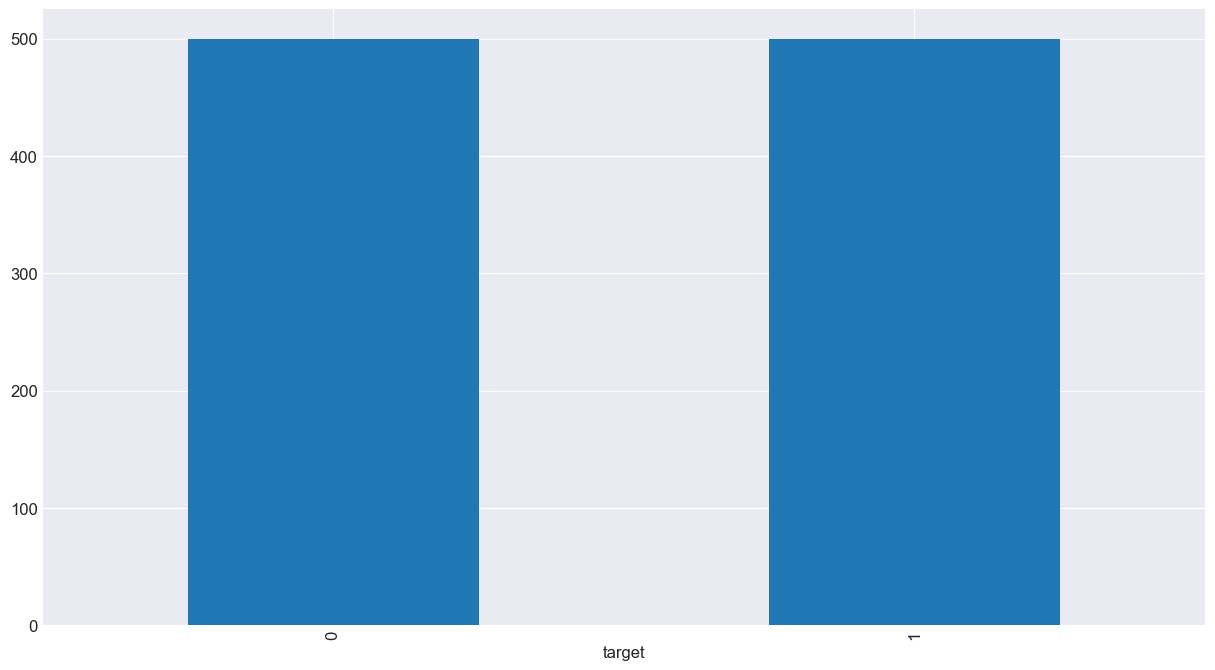

In [10]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

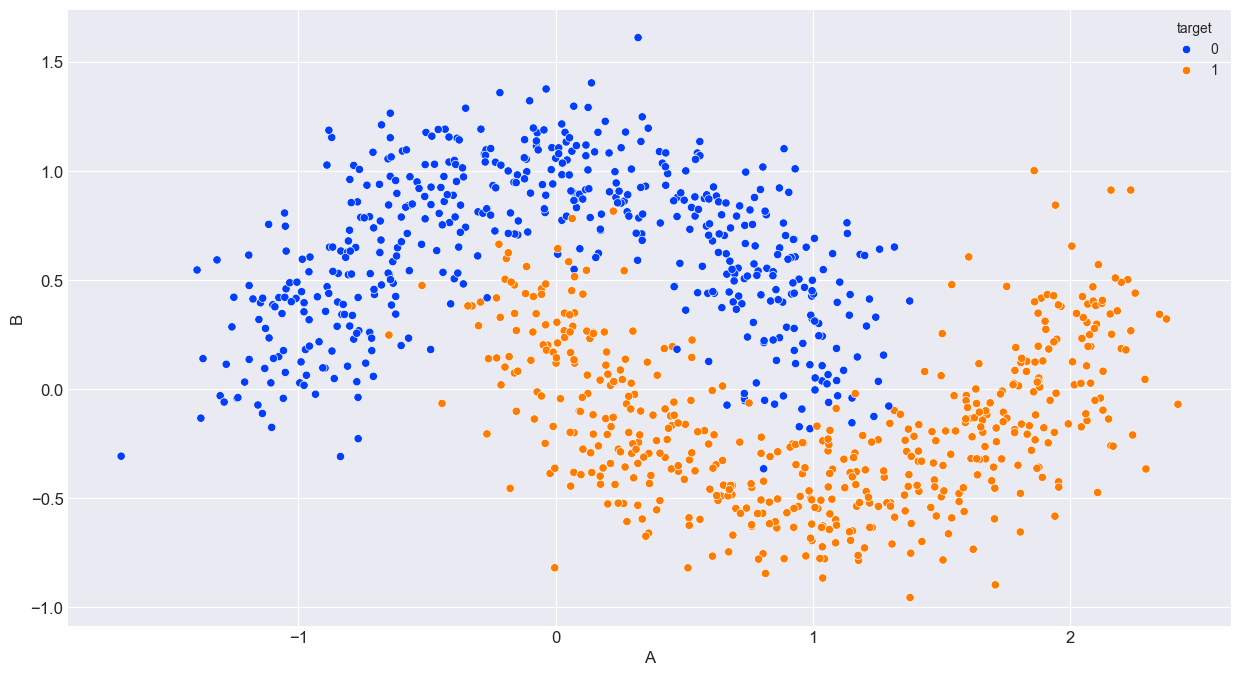

In [11]:
# Using Seaborn
ax = sns.scatterplot(data=data_df, # data from dataframe
                     x='A', y='B',  # X axis and y axis columns
                     palette=sns.color_palette("bright", 2), # color map
                     hue='target'); # Color as per target column

In [12]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [13]:
data_train.shape, data_test.shape

((900, 3), (100, 3))

In [14]:
rng.random(data_train.shape[1])

array([0.33026884, 0.40517732, 0.57473782])

Stochastic Gradient Descent

In [15]:
def sigmoid(z):
    return 1 / (1 + (np.exp(-z)))

In [16]:
def predict(row, weights):

    z = weights[0]

    for i in range (len(row) - 1):
        z += weights[i+1] * row[i] # z = (weight * X) + b
    
    return sigmoid(z)

In [29]:
def train_weights(train, n_epochs, alpha):
    errors = []
    weights = rng.random(train.shape[1]) # weights at random

    m = train.shape[0] # no of rows in training data

    for epoch in range(n_epochs):
        sum_error = 0.0

        for row in train:
            prediction = predict(row, weights)

            dz = prediction - row[-1]

            sum_error += -row[-1] * np.log(prediction)

            weights[0] = weights[0] - alpha * dz / m

            for i in range(len(row)-1):
                weights[i+1] = weights[i+1] - alpha * dz * row[i] / m
        
        errors.append(sum_error/m)
    
    return errors, weights

In [30]:
errors, weights = train_weights(data_train, EPOCHS, ALPHA)

In [31]:
errors

[0.18600802578239886,
 0.18652365770666413,
 0.1870327359235298,
 0.18753477305969124,
 0.18802929066130408,
 0.18851582175028697,
 0.18899391329419032,
 0.18946312856239084,
 0.18992304934317303,
 0.19037327799859843,
 0.19081343933679928,
 0.19124318228446574,
 0.19166218134566063,
 0.19207013783666083,
 0.19246678089015354,
 0.19285186822574504,
 0.1932251866872435,
 0.19358655255052162,
 0.19393581160883736,
 0.19427283904525858,
 0.19459753910425276,
 0.19490984457651572,
 0.1952097161127574,
 0.19549714138336044,
 0.19577213410166536,
 0.1960347329290757,
 0.19628500028026566,
 0.1965230210465658,
 0.19674890125508665,
 0.19696276668041207,
 0.19716476142475498,
 0.1973550464813912,
 0.1975337982949716,
 0.19770120733104996,
 0.19785747666583345,
 0.19800282060583863,
 0.19813746334581742,
 0.19826163767203522,
 0.19837558371675837,
 0.19847954776865653,
 0.1985737811427358,
 0.19865853911244769,
 0.1987340799056903,
 0.1988006637656416,
 0.19885855207662267,
 0.19890800655457702

In [32]:
weights

array([ 0.54500477,  1.18693245, -4.74031453])

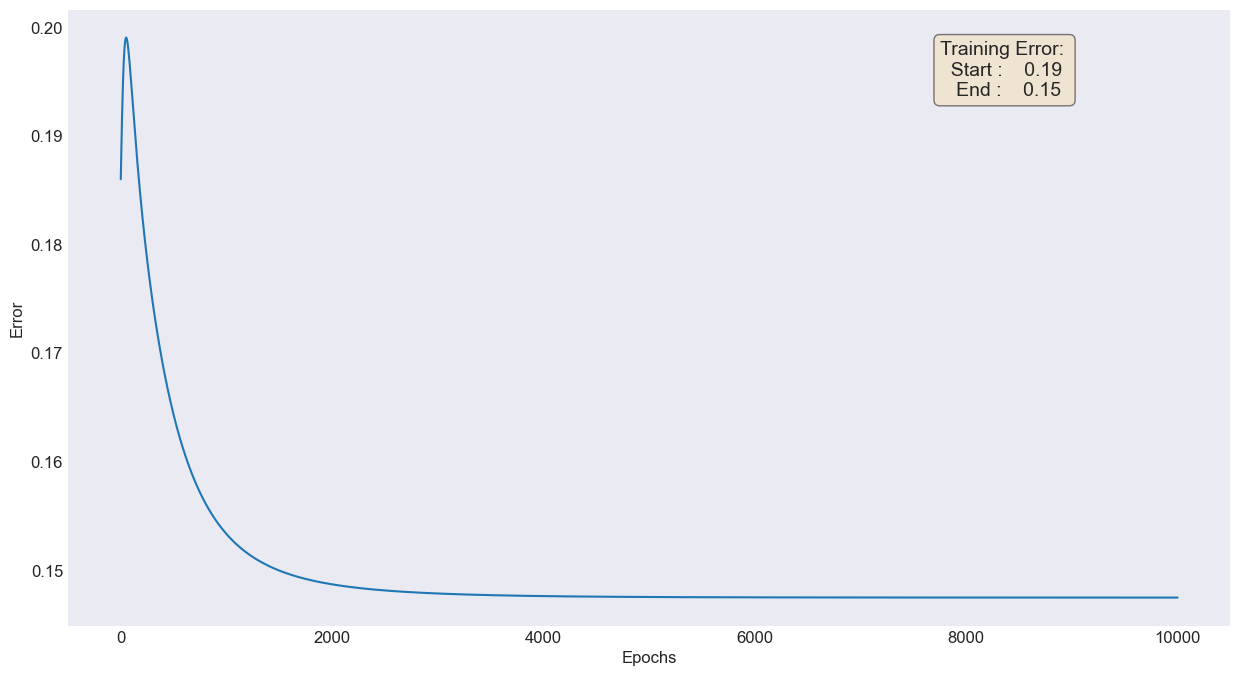

In [33]:
fig, ax = plt.subplots()
ax.plot(errors);

# little beautification
txtstr = "Training Error: \n  Start : {:7.2f}\n   End : {:7.2f}".format(errors[0],errors[-1]) #text to plot

# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper right in axes coords
ax.text(0.75, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")

ax.set_ylabel("Error")

ax.grid();

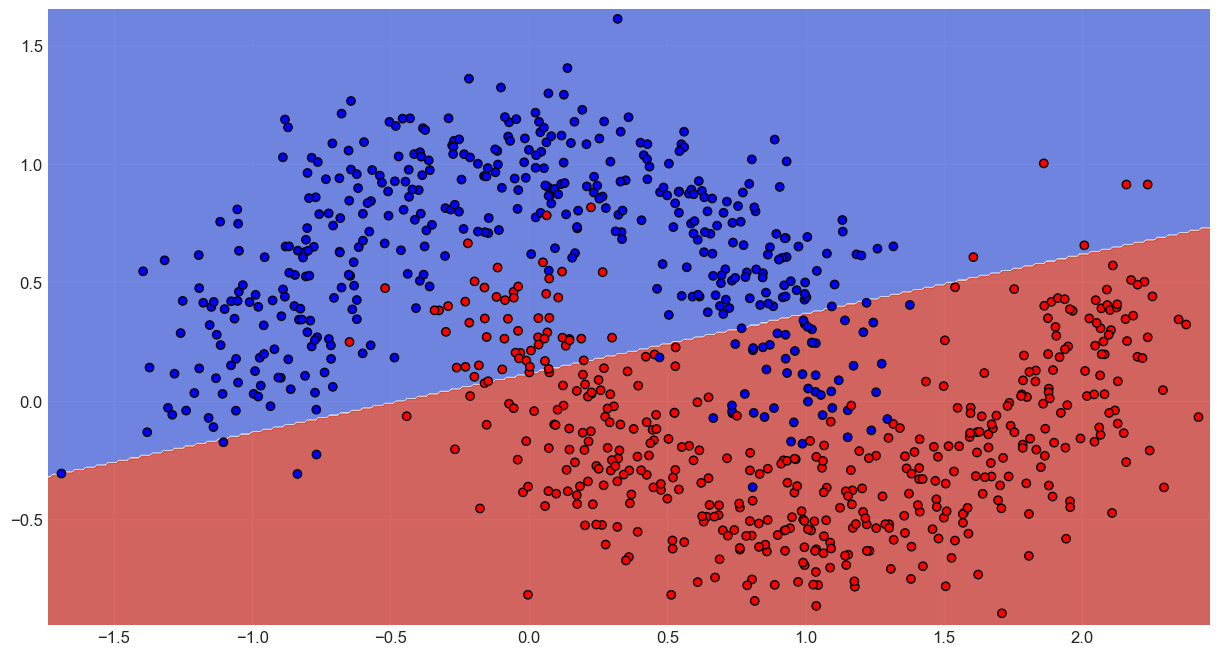

In [34]:
X = data_train

fig, ax = plt.subplots()
dm = 0.01

X_min, X_max = X[:,0].min() - 0.05, X[:,0].max() + 0.05
y_min, y_max = X[:,1].min() - 0.05, X[:,1].max() + 0.05

xx, yy = np.meshgrid(np.arange(X_min, X_max, dm),
                     np.arange(y_min, y_max, dm))

XX = np.c_[xx.ravel(), yy.ravel()]
XX = np.hstack((XX, np.ones((XX.shape[0],1))))

y_pred = []

for row in XX:
    pred = predict(row, weights)
    y_pred.append(np.round(pred)) # to get only 2 sections in the contour, we used np.round(pred)

Z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx, yy, Z, cmap=CMAP, alpha=0.8)
ax.scatter(X[:,0], X[:,1], c = X[:,2],edgecolors='k', cmap=plt.cm.bwr, marker='o');

In [35]:
xx.shape, yy.shape

((261, 421), (261, 421))

Training Accuracy

In [36]:
predictions = []

for row in data_train:
    
    a = predict(row, weights)
    
    prediction = 0
    
    if a >= 0.5: prediction = 1 # argmax

    predictions.append(prediction)

In [37]:
accuracy_score(data_train[:,-1], predictions)

0.8666666666666667

Testing Accuracy

In [38]:
predictions = []

for row in data_test:
    
    a = predict(row, weights)
    
    prediction = 0
    
    if a >= 0.5: prediction = 1
    predictions.append(prediction)

accuracy_score(data_test[:,-1], predictions)


0.9

In [39]:
cm = confusion_matrix(data_test[:, -1], predictions)
cm

array([[55,  3],
       [ 7, 35]], dtype=int64)

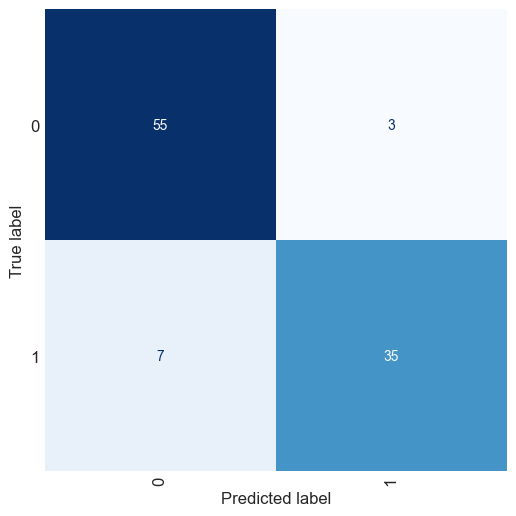

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
fig, ax = plt.subplots(figsize = (6,6))

disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)
# Disable the grid
ax.grid(False)

plt.show();